### Necessary Packages

In [9]:
import os
import sys
import dotenv
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Device for inference

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device.type)

cuda


### Loading histories

In [5]:
HISTORIES_DIR = dotenv.get_key(dotenv.find_dotenv(), "HISTORIES_DIR")
EVA02_hists = os.path.join(HISTORIES_DIR, "eva02")

In [6]:
# loading 5 folds histories
histories = []
for fold in range(5):
    fold_histories = pd.read_csv(os.path.join(EVA02_hists, f"fold_{fold}.csv"))
    histories.append(fold_histories)

In [11]:
def plot_loss_accuracy(train_history, val_history, title):
    fig, ax = plt.subplots(ncols=2)
    fig.suptitle(title, fontsize=18)
    fig.set_size_inches(20,6)

    ax[0].plot(train_history['epoch'], train_history['loss'], label='Training Loss', color='green')
    ax[0].plot(val_history['epoch'], val_history['loss'], label='Validation Loss', color='midnightblue')
    ax[0].set_title('Classifier Loss History')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid(linestyle='dashed', dash_joinstyle='miter', alpha=0.75, zorder=1, color='gray')

    ax[1].plot(train_history['epoch'], train_history['acc'], label='Training Accuracy', color='green')
    ax[1].plot(val_history['epoch'], val_history['acc'], label='Validation Accuracy', color='midnightblue')
    ax[1].set_title('Classifier Accuracy History')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid(linestyle='dashed', dash_joinstyle='miter', alpha=0.75, zorder=1, color='gray')

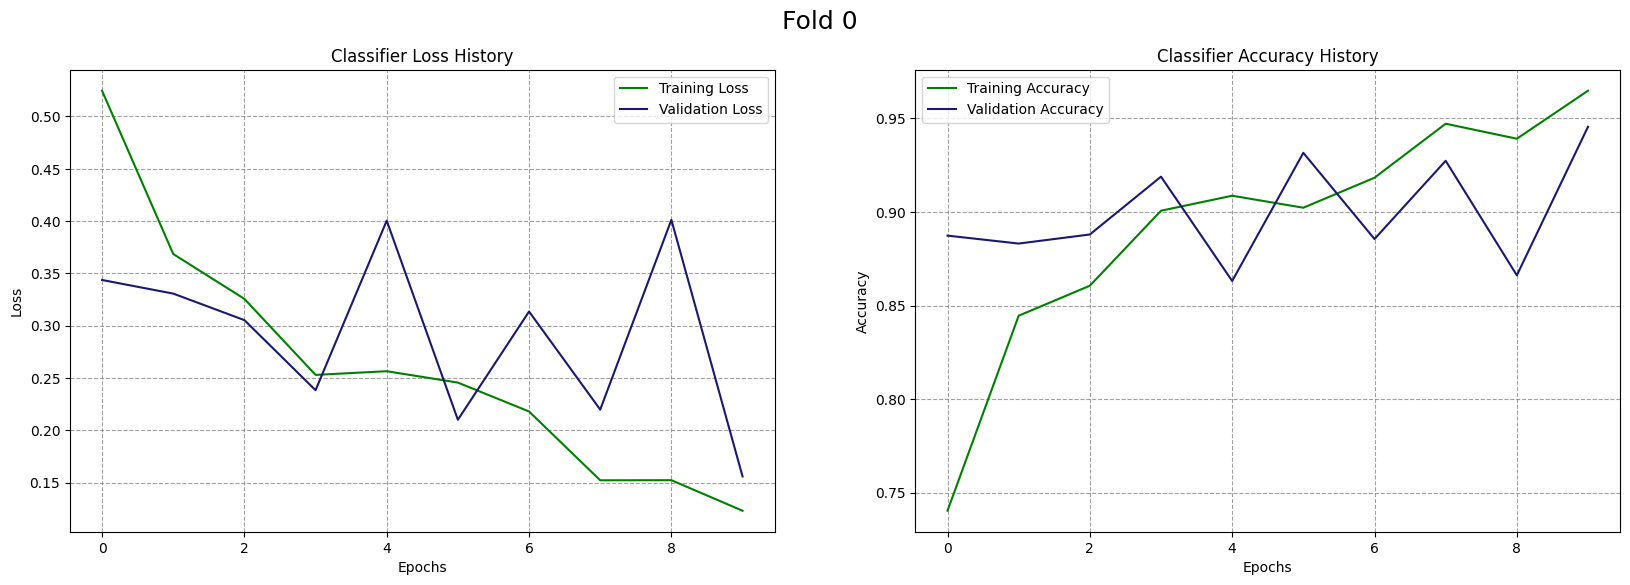

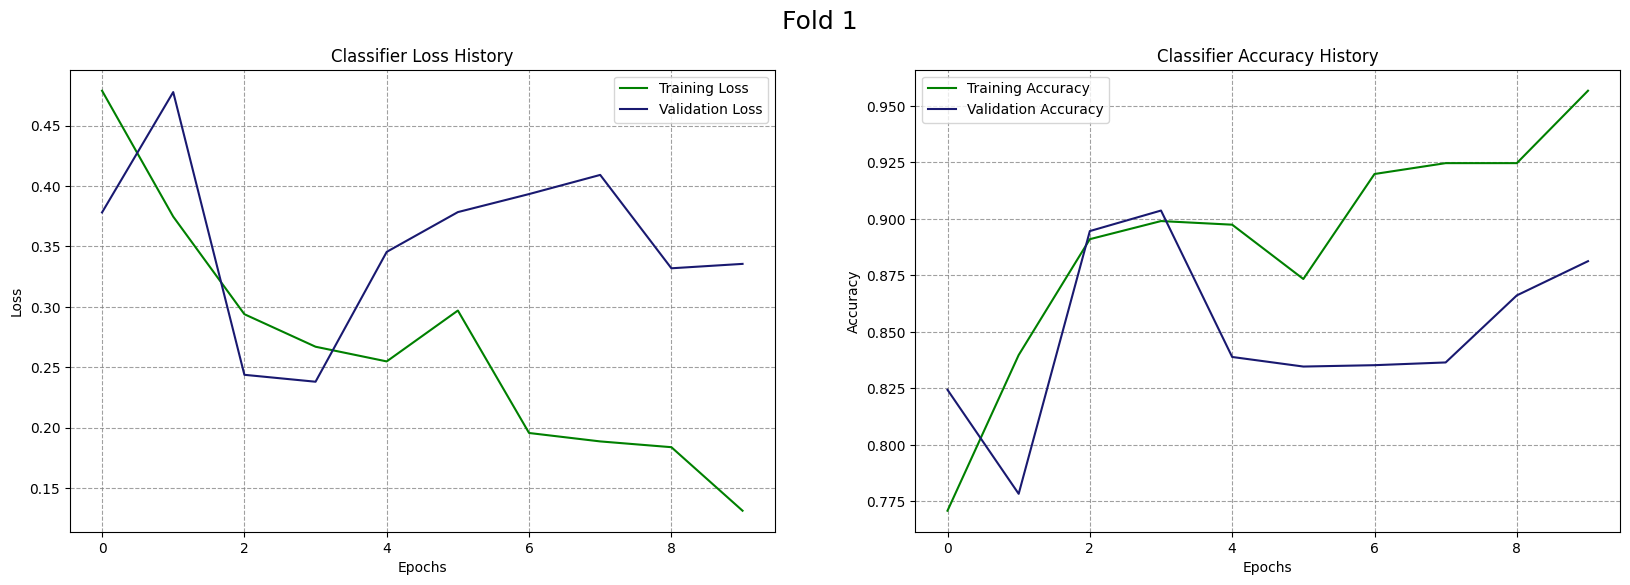

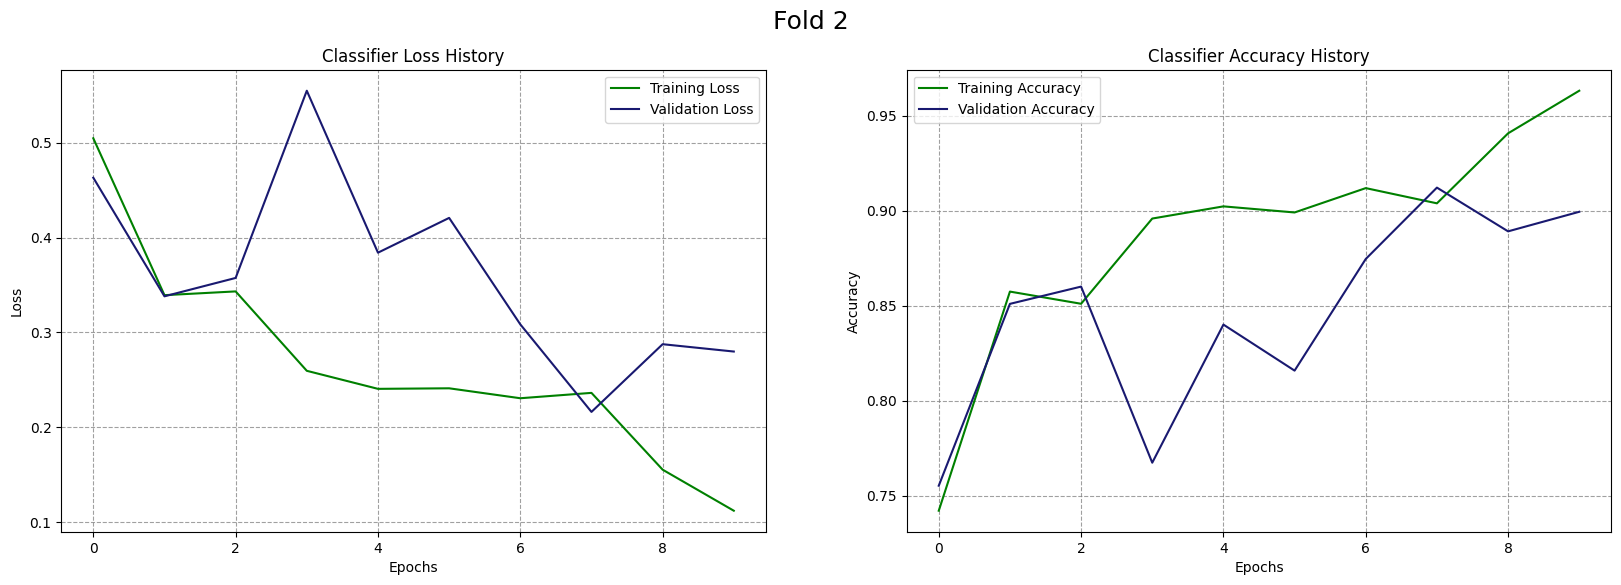

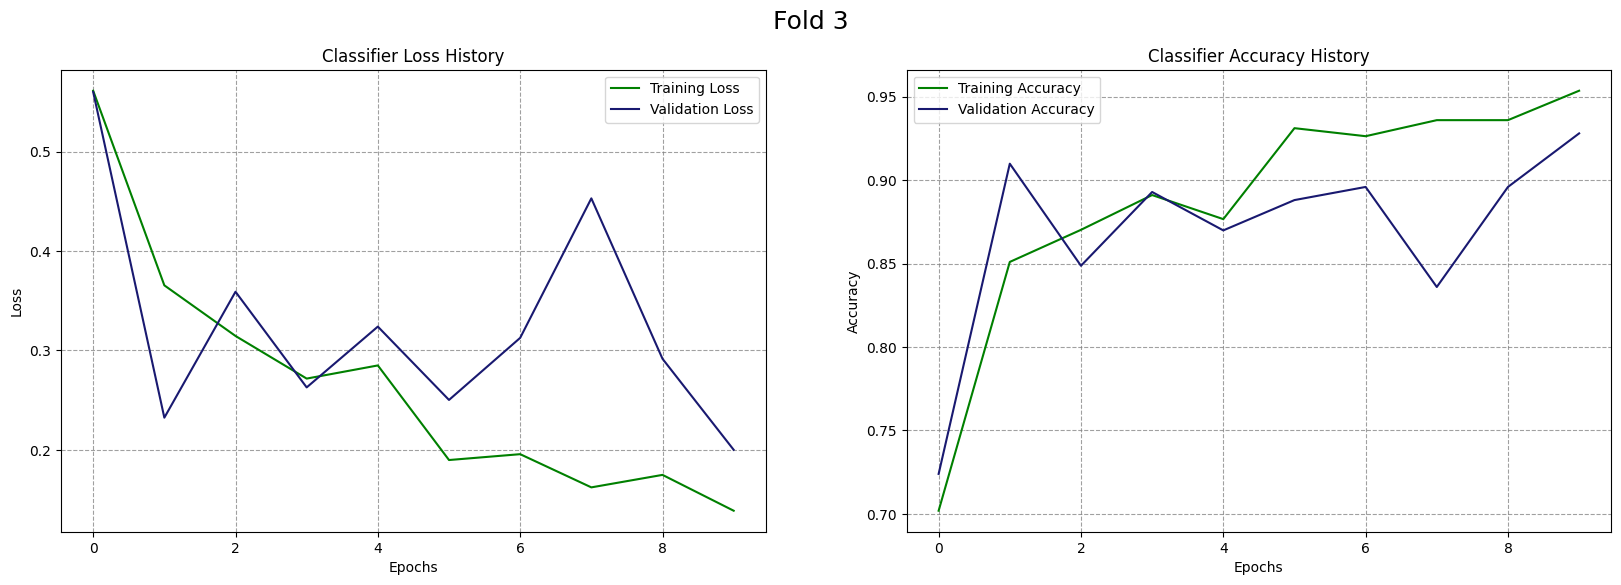

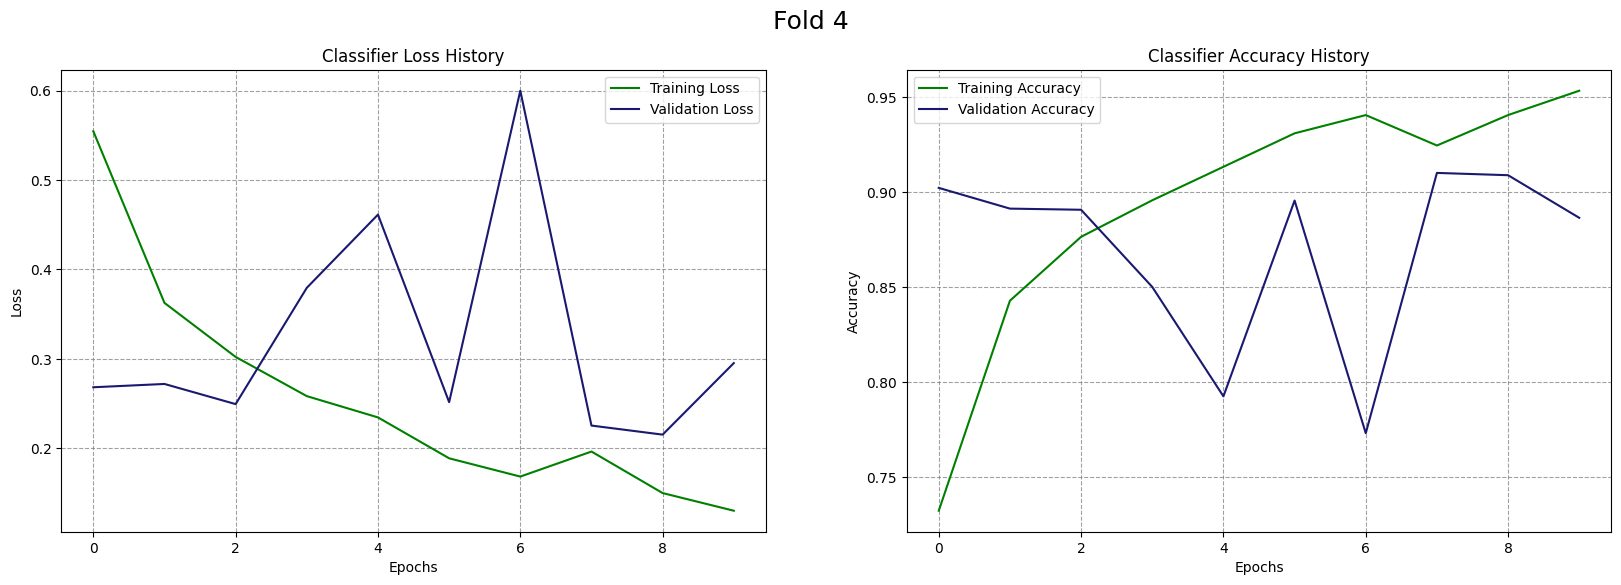

In [12]:
# plot loss and accuracy for each fold
for fold in range(5):
    train_history = histories[fold][histories[fold]['split'] == 'train']
    val_history = histories[fold][histories[fold]['split'] == 'val']
    plot_loss_accuracy(train_history, val_history, f"Fold {fold}")